In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# plt.rc('font', size=21)
# plt.rc('xtick', labelsize=21)
# plt.rc('ytick', labelsize=21)

fig_width_pt = 244.0  # Get this from LaTeX using \the\columnwidth
text_width_pt = 508.0 # Get this from LaTeX using \the\textwidth

inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt*1.5 # width in inches
fig_width_full = text_width_pt*inches_per_pt*1.5  # 17
fig_height =fig_width*golden_mean # height in inches
fig_size = [fig_width,fig_height] #(9,5.5) #(9, 4.5)
fig_height_full = fig_width_full*golden_mean

fig_size_full = [fig_width_full,fig_height_full] #(9,5.5) #(9, 4.5)

In [10]:
# file = '/Users/zgl12/ATClean/output/misc/2025rmx/2025rmx.o.1.00days.lc.txt'
# file_c = '/Users/zgl12/ATClean/output/misc/2025rmx/2025rmx.c.1.00days.lc.txt'

file = '/Users/zgl12/ATClean/output/misc/2025ngs/2025ngs.o.clean.lc.txt'
file_c = '/Users/zgl12/ATClean/output/misc/2025ngs/2025ngs.c.clean.lc.txt'

df = pd.read_csv(file, delim_whitespace=True)
df_c = pd.read_csv(file_c, delim_whitespace=True)

mask = (df['Mask'] == '0x0000') & (df['duJy'] < 50) #& (df['MJD'] > 60800)
mask_c = (df_c['Mask'] == '0x0000') & (df_c['duJy'] < 50) #& (df_c['MJD'] > 60800)

df

/var/folders/6v/pg_c9mqn3gn45gn_zmvy9w9cvfsx9j/T/ipykernel_74540/2016605438.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True)
/var/folders/6v/pg_c9mqn3gn45gn_zmvy9w9cvfsx9j/T/ipykernel_74540/2016605438.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_c = pd.read_csv(file_c, delim_whitespace=True)


,MJD,m,dm,uJy,duJy,F,err,chi/N,RA,Dec,...,y,maj,min,phi,apfit,mag5sig,Sky,Obs,Mask,duJy_new
0,57385.628796,-18.513,0.268,-143,38,o,0,2.89,233.81949,30.86549,...,8370.00,3.60,3.24,-85.3,-0.473,18.60,19.75,02a57385o0654o,0x0000,38.767481
1,57442.614715,-19.165,0.367,-78,29,o,0,2.86,233.81949,30.86549,...,8423.51,3.59,3.15,87.2,-0.489,18.58,19.56,02a57442o0646o,0x0000,29.998626
2,57442.641351,-18.247,0.164,-182,30,o,0,2.94,233.81949,30.86549,...,9016.29,3.61,3.27,80.9,-0.485,18.59,19.59,02a57442o0686o,0x80000,30.966394
3,57442.668178,-20.107,2.058,-33,68,o,0,1.19,233.81949,30.86549,...,1092.94,4.42,3.29,-5.3,-0.532,18.03,18.59,02a57442o0722o,0x0000,68.431846
4,57443.618601,-19.203,0.398,-76,30,o,0,1.95,233.81949,30.86549,...,8195.40,3.59,3.18,-89.4,-0.482,18.70,19.80,02a57443o0708o,0x0000,30.966394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,60929.257915,18.180,0.081,194,16,o,0,4.65,233.81949,30.86549,...,99.69,2.45,1.87,-52.1,-0.507,19.29,20.66,02a60929o0095o,0x0000,17.745917
4278,60934.231734,18.136,0.085,202,17,o,0,2.16,233.81949,30.86549,...,8307.91,2.64,2.48,58.5,-0.410,19.24,20.27,01a60934o0056o,0x0000,18.652549
4279,60934.235449,18.430,0.097,154,15,o,0,2.08,233.81949,30.86549,...,8346.93,2.52,2.42,81.0,-0.440,19.29,20.33,01a60934o0064o,0x0000,16.849854
4280,60934.246537,18.230,0.079,185,15,o,0,2.39,233.81949,30.86549,...,8270.61,2.49,2.38,-84.2,-0.449,19.34,20.33,01a60934o0088o,0x0000,16.849854


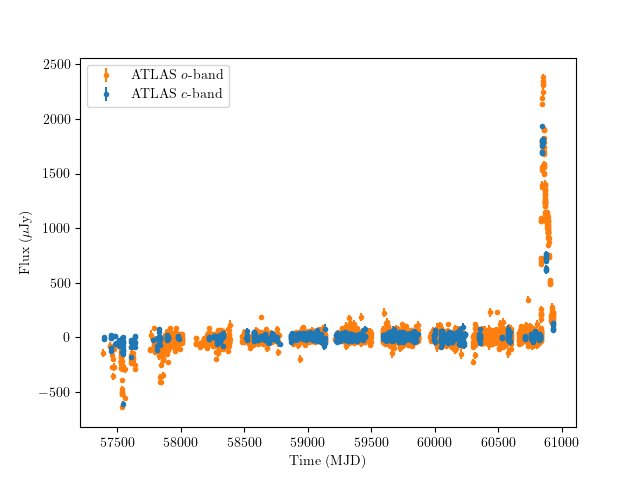

In [11]:
plt.figure()
plt.errorbar(df['MJD'][mask], df['uJy'][mask], df['duJy'][mask], fmt = '.', color = 'C1', label = r'ATLAS $o$-band')
plt.errorbar(df_c['MJD'][mask_c], df_c['uJy'][mask_c], df_c['duJy'][mask_c], fmt = '.', color = 'C0', label = r'ATLAS $c$-band')
plt.xlabel('Time (MJD)')
plt.ylabel('Flux ($\mu$Jy)')
plt.legend()
# plt.savefig('2025rmx_atlas_binned.png', dpi=300, bbox_inches='tight')
plt.show()